In [78]:
# Imports de packages

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
rcParams['figure.figsize'] = 15,10
import missingno as msno



In [79]:
# Import des données

df = pd.read_csv('data/data.csv', sep=";")


In [80]:
# Pandas Profiling 

#profile_data = ProfileReport(df_data , title="Profile Data", explorative=True)
#profile_data.to_notebook_iframe()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45136 entries, 0 to 45135
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DATE                      45136 non-null  object
 1   AGE                       45136 non-null  int64 
 2   JOB_TYPE                  44850 non-null  object
 3   STATUS                    44008 non-null  object
 4   EDUCATION                 43283 non-null  object
 5   HAS_DEFAULT               45136 non-null  object
 6   BALANCE                   45136 non-null  int64 
 7   HAS_HOUSING_LOAN          45136 non-null  object
 8   HAS_PERSO_LOAN            43782 non-null  object
 9   CONTACT                   32117 non-null  object
 10  DURATION_CONTACT          45136 non-null  int64 
 11  NB_CONTACT                45136 non-null  int64 
 12  NB_DAY_LAST_CONTACT       45136 non-null  int64 
 13  NB_CONTACT_LAST_CAMPAIGN  45136 non-null  int64 
 14  RESULT_LAST_CAMPAIGN  

<AxesSubplot:xlabel='JOB_TYPE', ylabel='count'>

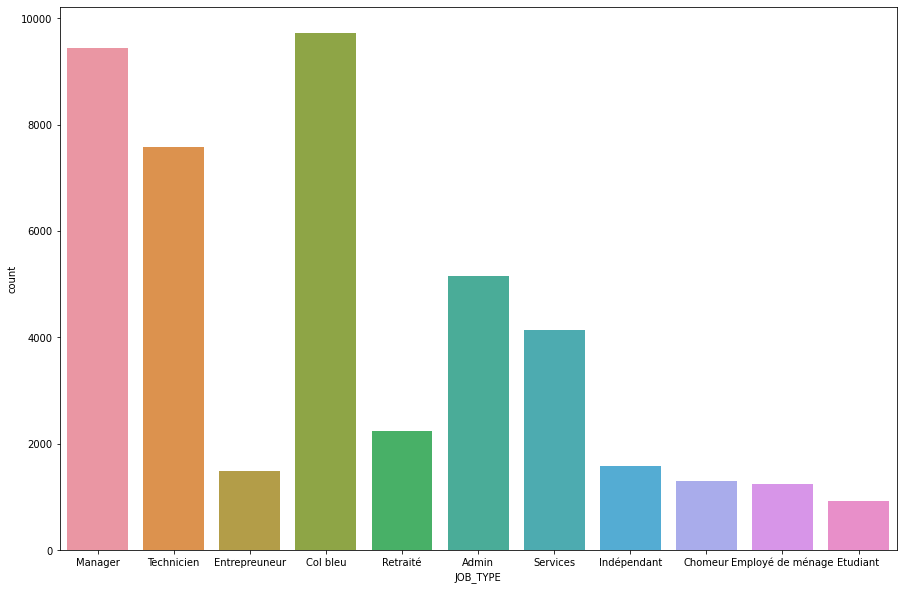

In [82]:
sns.countplot(x=df['JOB_TYPE'])

<AxesSubplot:xlabel='JOB_TYPE', ylabel='count'>

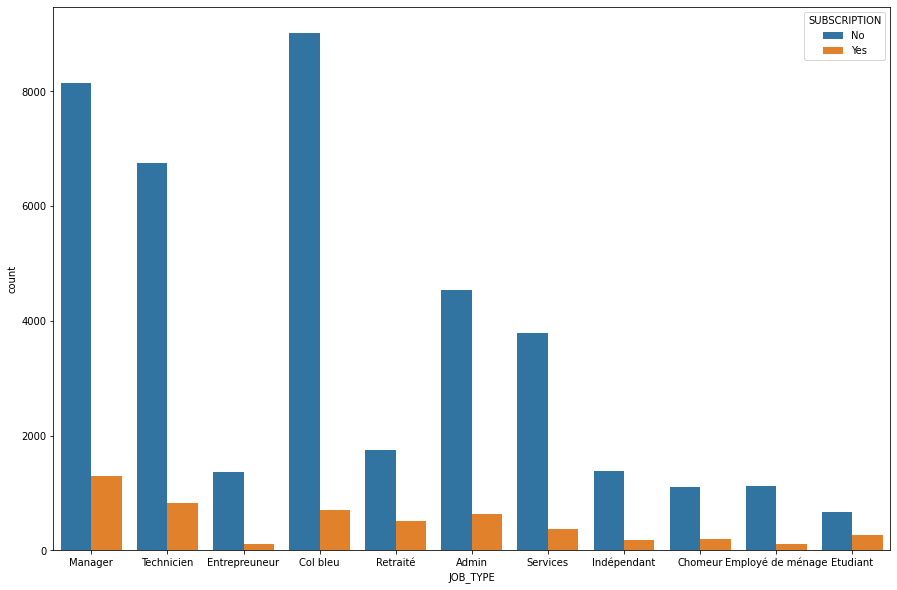

In [83]:
# Faire une fonction pour afficher 
sns.countplot(x=df['JOB_TYPE'], hue=df['SUBSCRIPTION'])

<AxesSubplot:xlabel='AGE', ylabel='Count'>

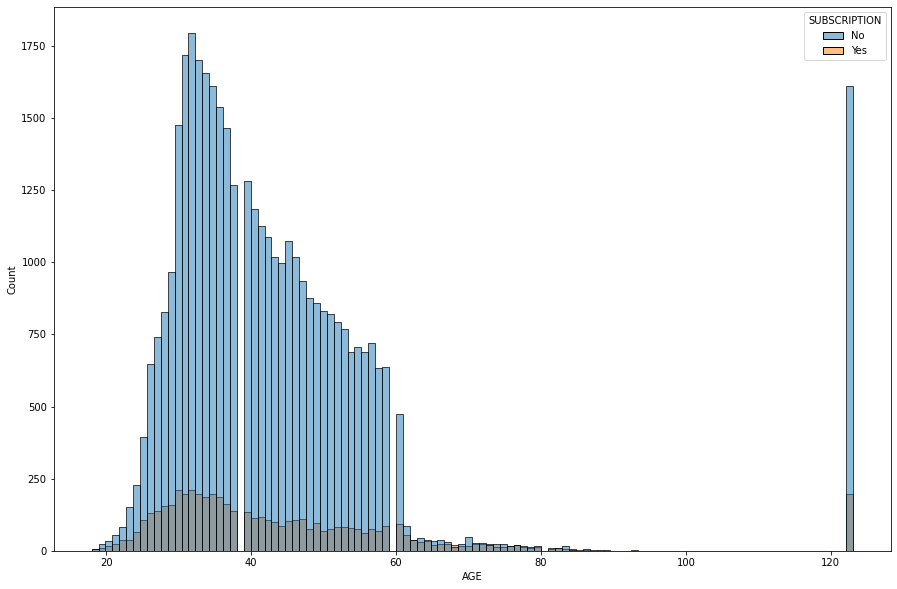

In [84]:
sns.histplot(x=df['AGE'], hue=df['SUBSCRIPTION'])

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

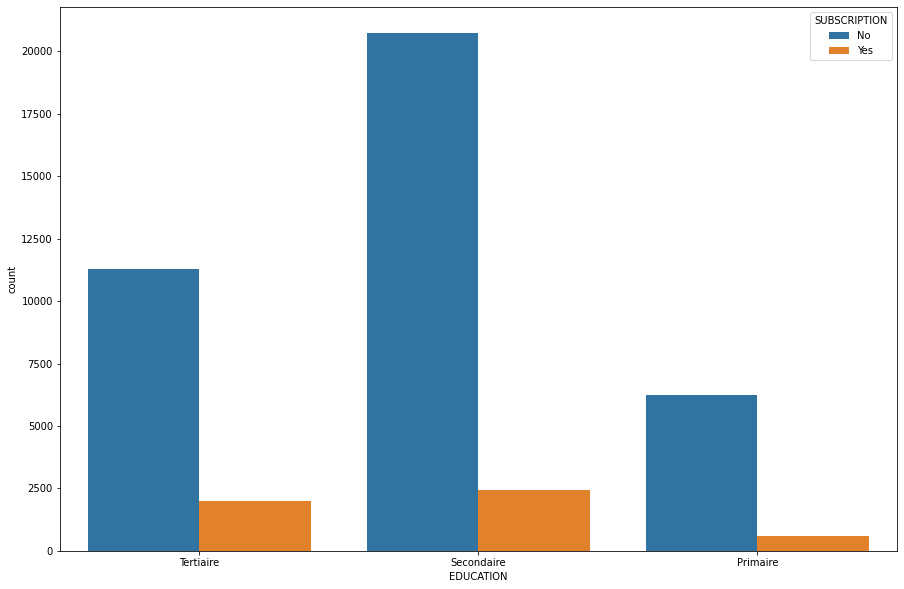

In [85]:
sns.countplot(x=df['EDUCATION'], hue=df['SUBSCRIPTION'])

<AxesSubplot:xlabel='STATUS', ylabel='count'>

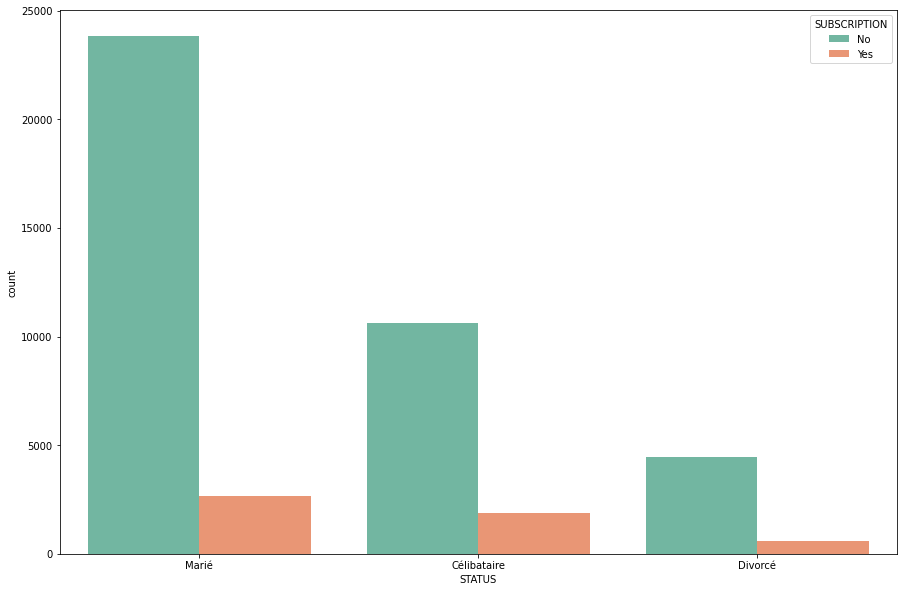

In [86]:
sns.countplot(x=df['STATUS'], hue=df['SUBSCRIPTION'], palette="Set2")

<AxesSubplot:xlabel='HAS_HOUSING_LOAN', ylabel='count'>

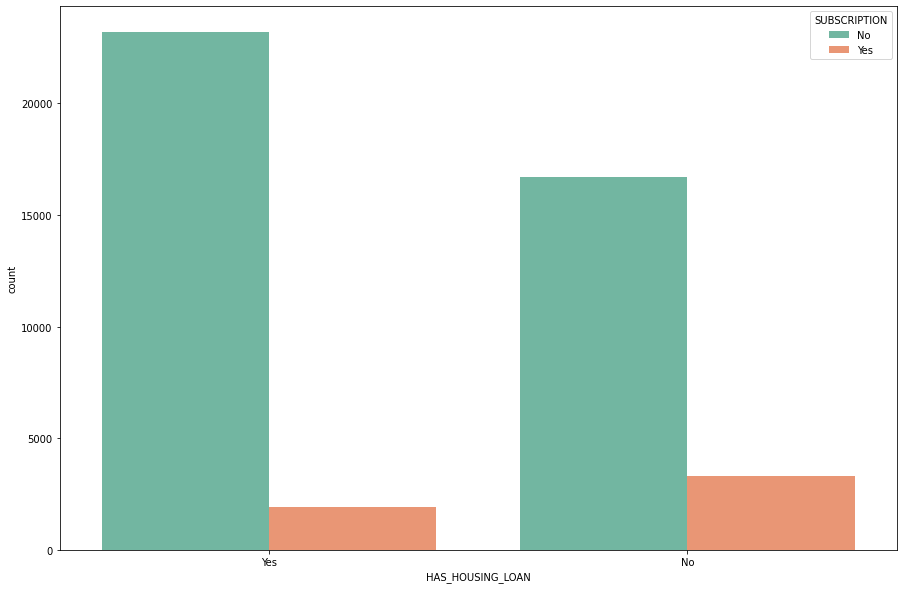

In [87]:
sns.countplot(x=df['HAS_HOUSING_LOAN'], hue=df['SUBSCRIPTION'], palette="Set2")

<AxesSubplot:xlabel='HAS_PERSO_LOAN', ylabel='count'>

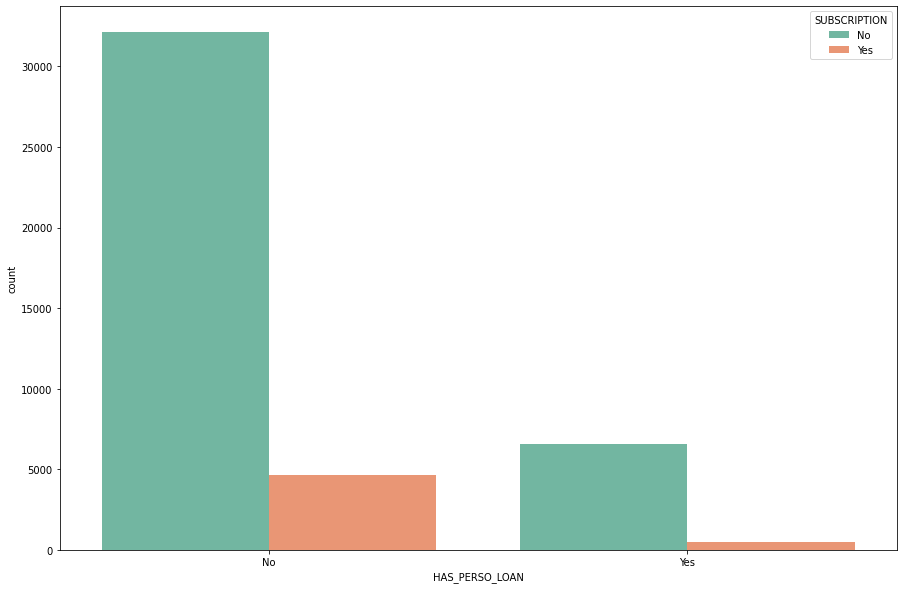

In [88]:
sns.countplot(x=df['HAS_PERSO_LOAN'], hue=df['SUBSCRIPTION'], palette="Set2")

<AxesSubplot:xlabel='CONTACT', ylabel='count'>

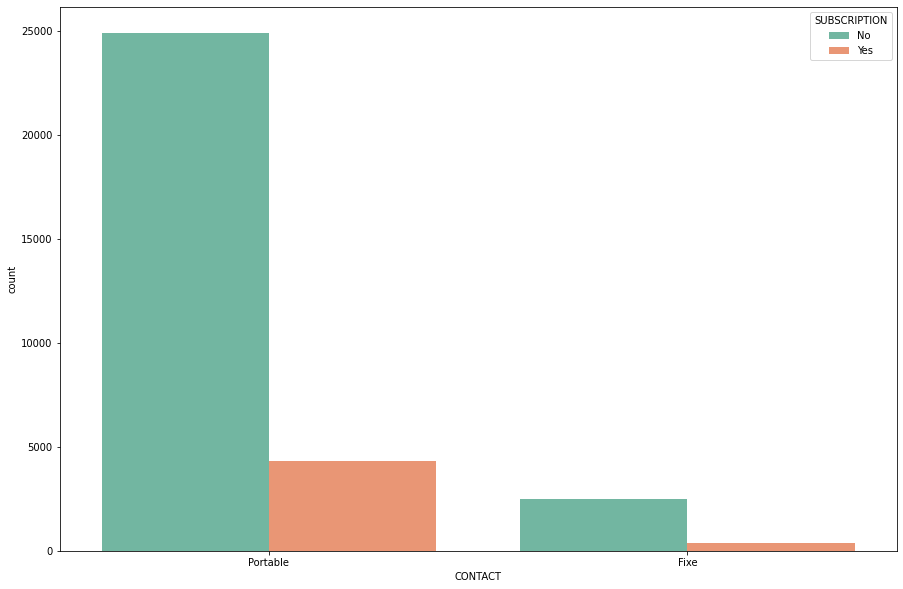

In [89]:
sns.countplot(x=df['CONTACT'], hue=df['SUBSCRIPTION'], palette="Set2")

<AxesSubplot:xlabel='DATE', ylabel='count'>

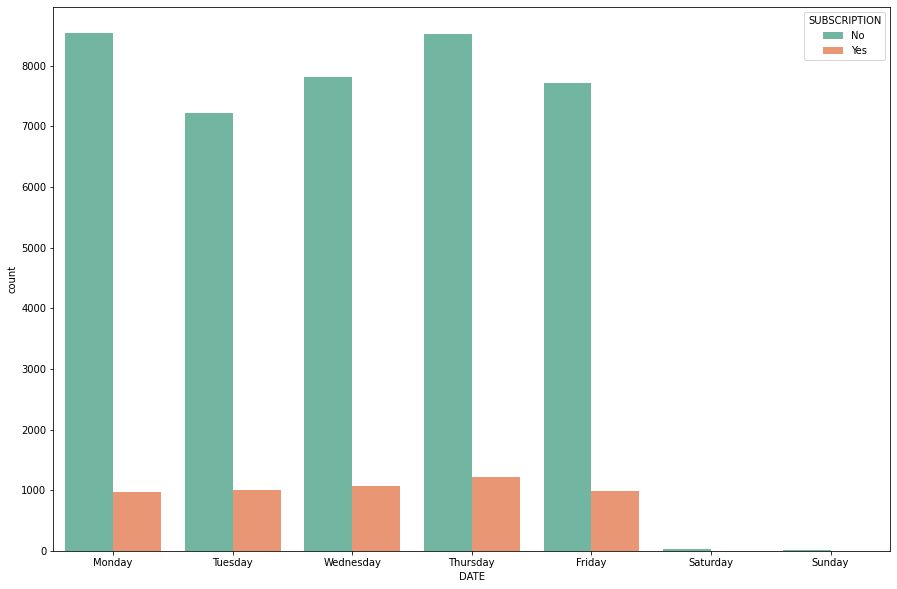

In [90]:
df['DATE'] = pd.to_datetime(df['DATE'])
sns.countplot(x=df['DATE'].dt.day_name(), hue=df['SUBSCRIPTION'], palette="Set2")

<AxesSubplot:ylabel='MONTH'>

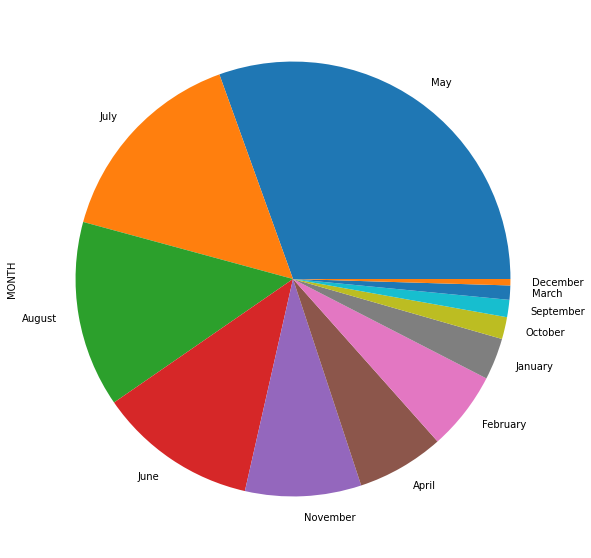

In [91]:

df['MONTH'] = df['DATE'].dt.month_name()
df['MONTH'].value_counts().plot(kind="pie")
# La campagne a été très intense au début de l'année bancaire (MAY)

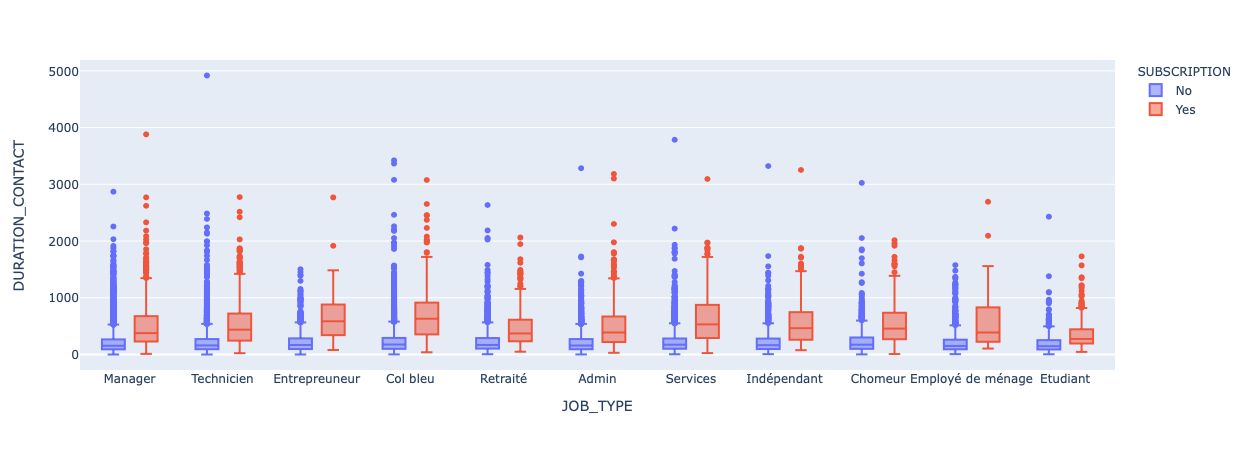

In [92]:

%matplotlib inline
fig = px.box(df, x="JOB_TYPE", y="DURATION_CONTACT", color="SUBSCRIPTION")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

<AxesSubplot:xlabel='JOB_TYPE', ylabel='DURATION_CONTACT'>

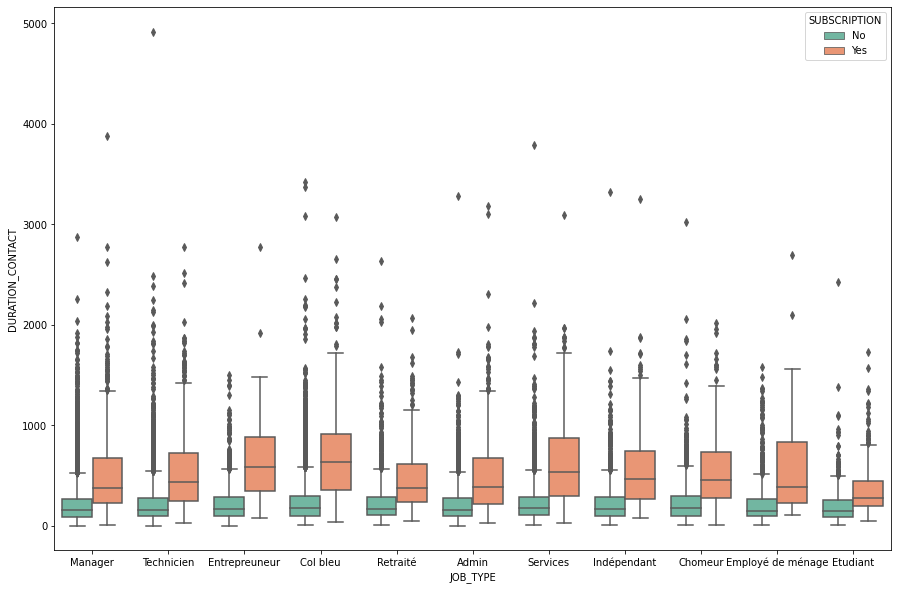

In [109]:
rcParams['figure.figsize'] = 15,10
sns.boxplot(x=df['JOB_TYPE'], y=df['DURATION_CONTACT'], hue=df['SUBSCRIPTION'], palette="Set2")

In [94]:
#sns.boxplot(x=df['JOB_TYPE'], y=df['EDUCATION'], hue=df['SUBSCRIPTION'], palette="Set2")

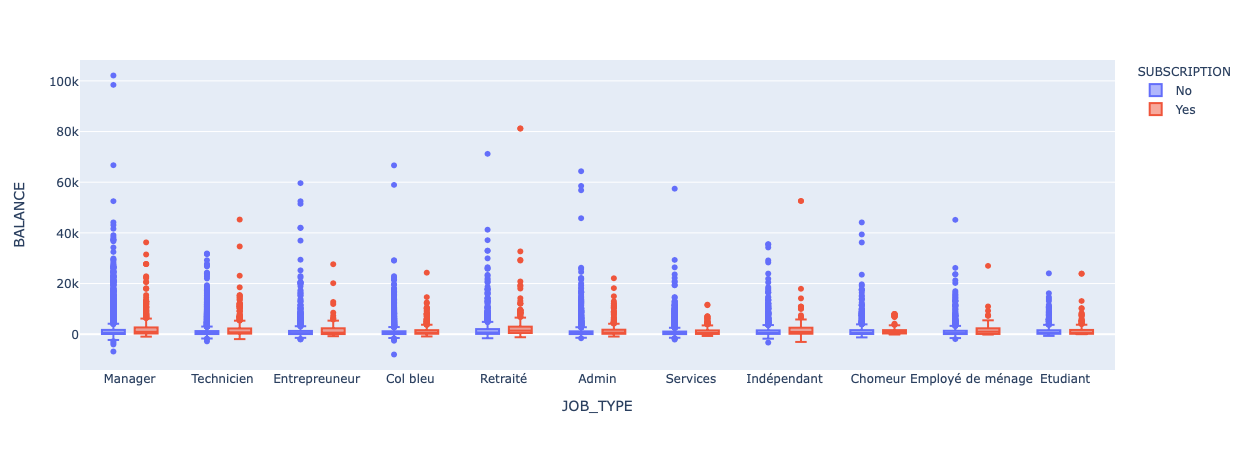

In [95]:
#sns.violinplot(x=df['JOB_TYPE'], y=df['BALANCE'], hue=df['SUBSCRIPTION'], palette="Set2")
fig = px.box(df, x="JOB_TYPE", y="BALANCE", color="SUBSCRIPTION")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

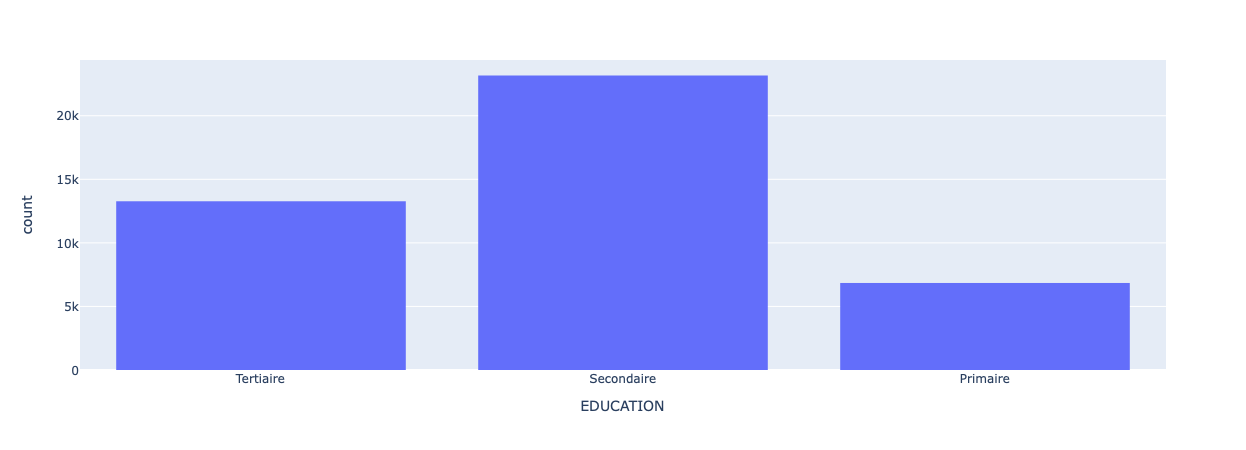

In [96]:
fig = px.histogram(df, x="EDUCATION")
fig.show()

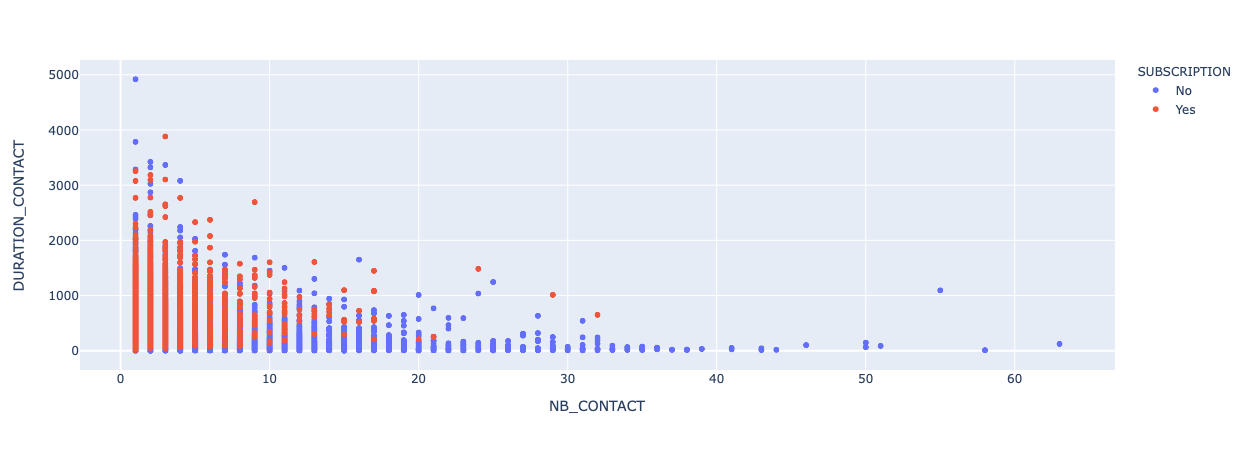

In [97]:
fig = px.scatter(df, x="NB_CONTACT", y="DURATION_CONTACT", color="SUBSCRIPTION")
fig.show()

In [98]:
# définir les JOB_TYPE missing en "Retraité"

df['JOB_TYPE'][df['AGE']>65].value_counts()

Retraité             709
Manager              439
Col bleu             362
Technicien           341
Admin                200
Services             169
Employé de ménage     70
Indépendant           66
Entrepreuneur         53
Chomeur               50
Etudiant              37
Name: JOB_TYPE, dtype: int64

In [99]:
df.isna().sum()

DATE                            0
AGE                             0
JOB_TYPE                      286
STATUS                       1128
EDUCATION                    1853
HAS_DEFAULT                     0
BALANCE                         0
HAS_HOUSING_LOAN                0
HAS_PERSO_LOAN               1354
CONTACT                     13019
DURATION_CONTACT                0
NB_CONTACT                      0
NB_DAY_LAST_CONTACT             0
NB_CONTACT_LAST_CAMPAIGN        0
RESULT_LAST_CAMPAIGN        36939
SUBSCRIPTION                    0
MONTH                           0
dtype: int64

<AxesSubplot:xlabel='JOB_TYPE', ylabel='count'>

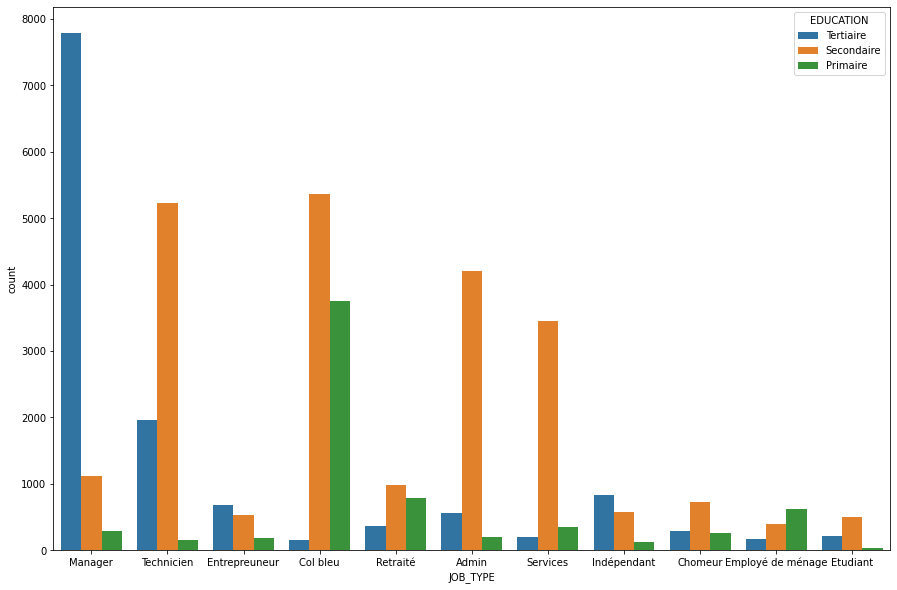

In [110]:
sns.countplot(x=df['JOB_TYPE'], hue=df['EDUCATION'])

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

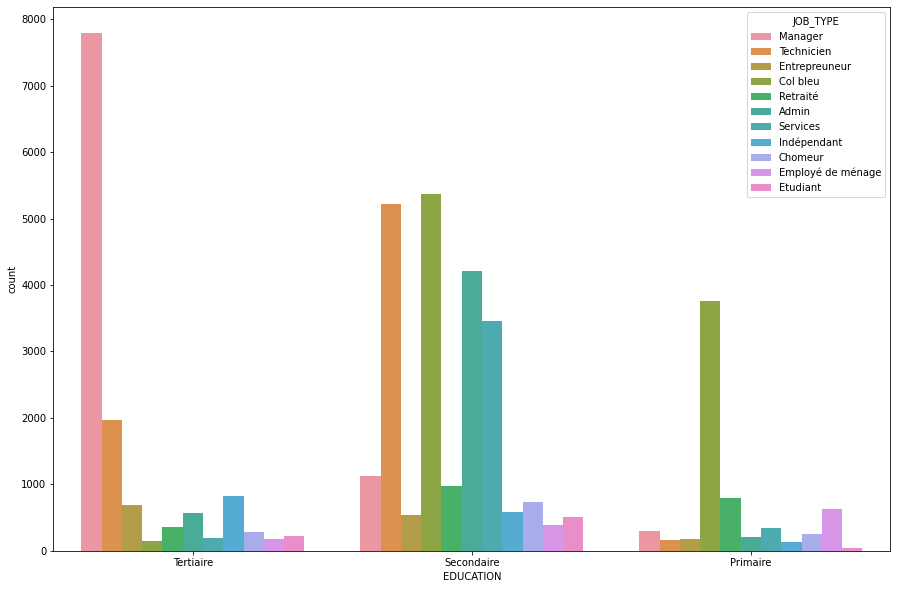

In [111]:
sns.countplot(x=df['EDUCATION'], hue=df['JOB_TYPE'])

In [112]:
def check_missing(df,feat1,feat2):
    jobs=list(df[feat1].unique())
    edu=list(df[feat2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[feat2]==e][feat1]
        print(f"{feat1} {e} :{dfe.isna().sum()}")
check_missing(df,"EDUCATION", "JOB_TYPE")

EDUCATION Manager :241
EDUCATION Technicien :242
EDUCATION Entrepreuneur :76
EDUCATION Col bleu :454
EDUCATION nan :0
EDUCATION Retraité :119
EDUCATION Admin :171
EDUCATION Services :150
EDUCATION Indépendant :39
EDUCATION Chomeur :29
EDUCATION Employé de ménage :45
EDUCATION Etudiant :162


In [103]:
check_missing(df,"JOB_TYPE", "EDUCATION")

JOB_TYPE Tertiaire :39
JOB_TYPE Secondaire :71
JOB_TYPE nan :0
JOB_TYPE Primaire :51


Nombre de EDUCATION manquant pour le manager: 241
Nombre de EDUCATION manquant pour le Technicien: 242
Nombre de EDUCATION manquant pour le services: 150
Nombre de EDUCATION manquant pour le independant: 39


Nombre de job_type manquant pour le tertiaire: 39
Nombre de job_type manquant pour le primaire: 51


<AxesSubplot:>

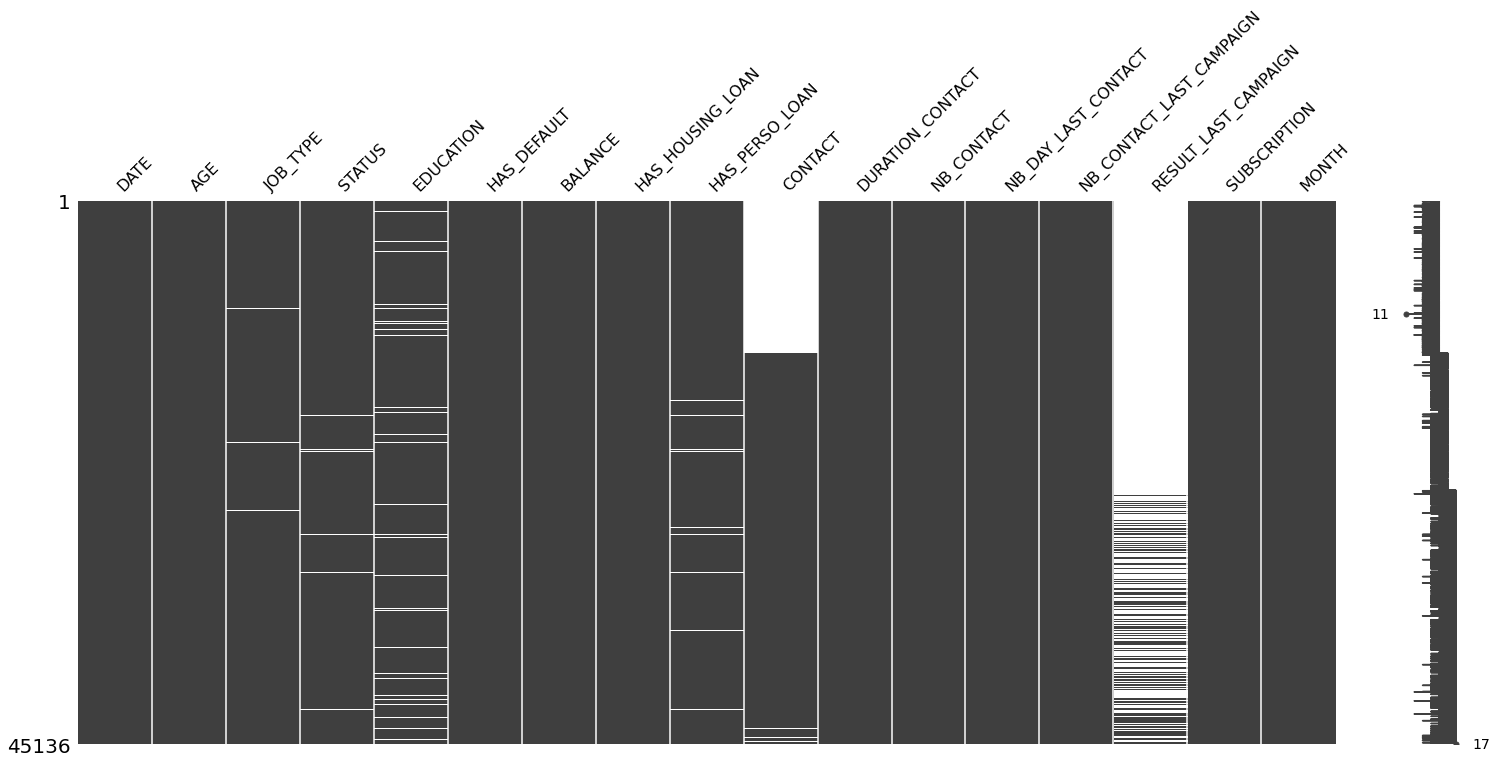

In [106]:
msno.matrix(df)

In [113]:
df['EDUCATION'].info()

AttributeError: 'Series' object has no attribute 'info'